In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10) #..........................
# tải tập dữ liệu
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 
# Chuẩn hóa
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
# One-Hot Encoding
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

170508288/170498071 [==============================] - 2s 0us/step
train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


(10000, 10)

In [ ]:
from tensorflow import keras#từ tensorflow nhập keras
model = keras.models.load_model('/content/drive/MyDrive/Tài liệu năm 3/kỳ 2 năm 3/Nhập môn TTNT/cifar10/finalmodel.h5')#tải dữ liệu model
#......load model

[3 8 8 0 6 6 1 6 3 1]


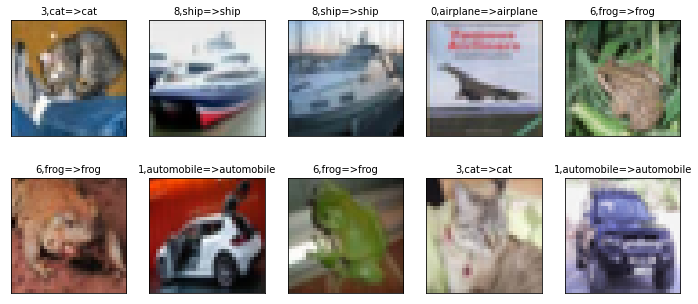

In [ ]:
# bị trùng nên tìm cafcomment lại vào
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(labels[i][0])+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
pre=model.predict(x_img_test_normalize)
prediction=np.argmax(pre,axis=1)
print(prediction[:10])
# print(prediction[:10])

plot_images_labels_prediction(x_img_test,y_label_test,prediction,0, 10)


In [ ]:
#thử test từng ảnh một
img = cv2.imread("/content/drive/MyDrive/rcnn/cifar10/image/2.jpg") #lấy kích thước ảnh
img = cv2.resize(img, dsize=(32,32))#thay đổi kích thước ảnh
predict = model.predict(img.reshape(1,32,32,3)) #dự đoán kết quả
plt.imshow(img) #xuất hình ảnh
print( label_dict[np.argmax(predict)], end =' ') #xuất kết quả

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
# example of loading the resnet50,mobilenetv3 model
#from tensorflow.keras.applications. import MobileNetV3Small
# load model
#Instantiating ResNet50,mobilenetv3
base_model = tf.keras.applications.MobileNetV3Small(weights='imagenet')

#Defining and Adding layers
model=Sequential()
#Add the Dense layers along with activation and batch normalization
model.add(base_model)
model.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dropout(0.4))
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(0.3))#Adding a dropout layer that will randomly drop 30% of the weights
model.add(Dense(128,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(64,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(6,activation=('softmax')))
opt = Adam(learning_rate=1e-4, decay=1e-4 / epochs)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

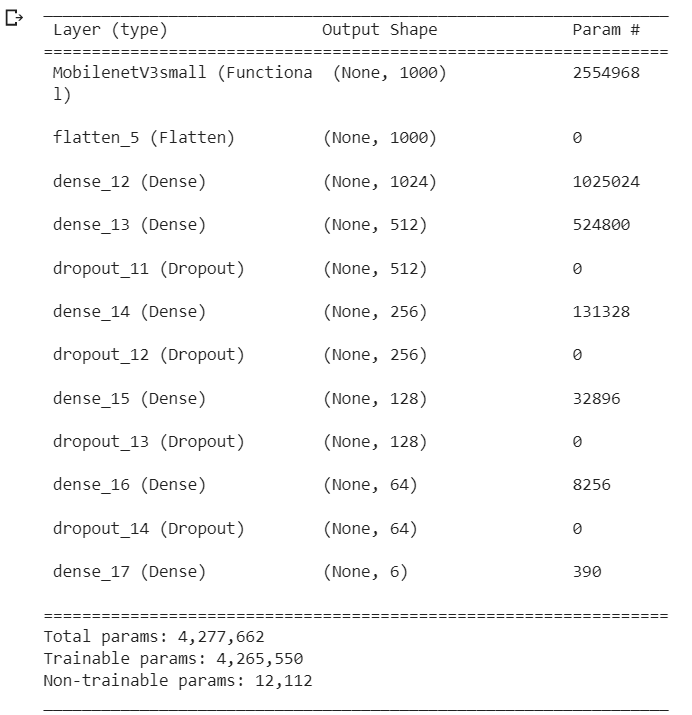